In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

In [2]:
%matplotlib inline

In [3]:
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0]

In [4]:
import data_prep_new as dpn
import preprocess as prep
reload(dpp)

<module 'data_prep_pyn' from '/mnt/home/szheng/projects/util_code/data_prep_pyn.py'>

In [17]:
cell_cols_d = dpp.get_cell_cols_d_with_brainregion(cell_metrics)
br = 'CA1'
ct=  'pyr'
cell_cols = cell_cols_d[br,ct]

In [10]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
# data_dir_full = db.query('owner=="ipshita"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] #0
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0]

# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses='*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
# ripples = mat_to_return['ripples']
cell_metrics = mat_to_return['cell_metrics']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df = dpp.group_into_trialtype(spk_beh_df)
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']

# import nmf_one_session as nos
# from itertools import product
# reload(nos)
# # condition_df = {'do_normalize':[True,False],'speed_thresh':[0,1,5],'israte':[True,False]}
# condition_df = {'do_normalize':[False],'speed_thresh':[1],'israte':[True]}
# condition_df = pd.DataFrame(list(product(*condition_df.values())),columns=list(condition_df.keys()))
# n_compo = 4
# nmf_res_d = {}

# for _,combo in condition_df.iterrows():
#     do_normalize,speed_thresh,israte = combo['do_normalize'],combo['speed_thresh'],combo['israte']
#     res_to_save_name = f'nmf_{n_compo}_normalize_{do_normalize}_speedthresh_{int(speed_thresh)}_rate_{israte}'
#     nmf_res_d[tuple(combo.values)]=nos.nmf_one_session(data_dir_full,kwargs_={'n_compo':n_compo,'doplots':False,'n_clust':6,'do_normalize':do_normalize,'force_reload':False,'dosave':False,'speed_thresh':speed_thresh,'res_to_save_name':res_to_save_name,'israte':israte})




load *SessionPulses.Events.mat failed


In [6]:
reload(dpp)
spk_beh_df =dpp.add_stim(spk_beh_df,sessionPulses,stim_key='stim')

In [86]:
nbins = 8
beh_df = dpp.add_lin_binned(beh_df,nbins)

In [87]:
import cluster_spikes as cs
spike_trains_with_label = cs.get_spike_triggered_label(spike_trains,beh_df,label=['lin','x','y','speed','lin_binned'],groupby_key='task_index')



/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: R

In [88]:
spike_trains_with_label[0][1]

,lin,x,y,speed,lin_binned
26.553400,26.562428,25.965626,35.209131,9.476471,1.0
26.634833,28.405699,24.519723,36.031343,9.937334,1.0
27.668667,51.388440,2.865972,41.180527,13.374292,2.0
28.841733,80.218351,7.883190,68.597592,11.207746,3.0
28.977967,83.786248,8.351712,72.015616,10.436525,3.0
...,...,...,...,...,...
1888.218567,85.517263,7.053441,8.322249,0.063598,4.0
1888.454667,85.375960,6.981676,8.233723,0.045889,4.0
1888.548567,85.375960,6.981683,8.233724,0.042836,4.0
1888.561167,85.375960,6.981685,8.233724,0.042456,4.0


<IPython.core.display.Javascript object>


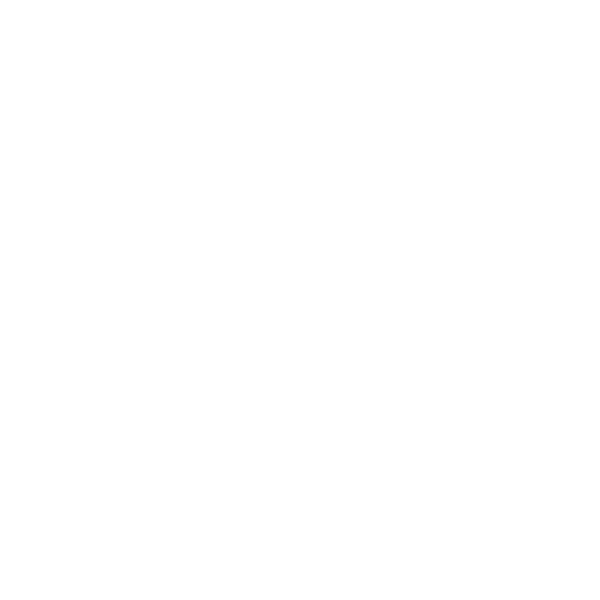

In [92]:
import raster_new as rn
%matplotlib notebook
uid = 3
color = ['C'+str(int(s)) for s in spike_trains_with_label[0][uid]['lin_binned']]
fig=rn.plot_raster_2d_in_trial(uid, {0:spike_trains_with_label[0]}, beh_df.query('task_index==0'), c=color,fig=None,ax=None)

In [6]:
reload(dpp)
spk_beh_df,bins = dpp.add_lin_binned(spk_beh_df,nbins)

NameError: name 'nbins' is not defined

In [15]:
# get place fields!!!!
import place_field_analysis as pf
reload(pf)

# cell_cols_d = dpp.get_cell_cols_d_with_brainregion(cell_metrics)
br = 'CA1'
ct=  'pyr'
# cell_cols = cell_cols_d[br,ct]
cell_cols = cell_cols_d['pyr']

spk_beh_df,bins = dpp.add_lin_binned(spk_beh_df,nbins=100)
_,spk_beh_df=dpp.group_into_trialtype(spk_beh_df)
fr_map_d,count_d,occu_d = pf.ratemap_from_spk_beh_df_alltrialtype(spk_beh_df,cell_cols,speed_thresh=1.,nbins=100,smth_in_bin=2.5)


# get fields
fr_map_peaks_d = {}
field_res_d = {}
min_rate=0.6
for key in fr_map_d.keys():

    fr_map = fr_map_d[key]
    count = count_d[key]
    occu = occu_d[key]
    field_res_d[key] =pf.get_field_peaks_one_trialtype(fr_map,count,occu,min_rate=min_rate)
    


In [16]:
# get field params!!!!!
import place_field_analysis as pf
reload(pa)
nbins = 10
spk_beh_df,bins = dpp.add_lin_binned(spk_beh_df,nbins)
gpb = spk_beh_df.groupby('trial_type')
field_params_all = {}
fr_map_trial_all = {}
X_all = {}
X_all_norm = {}
cell_cols = cell_cols_d['pyr']
gauss_width = 2.5 * (170 / 222) # in ipshita's case, smaller maze
for key,val in gpb:
    fr_map_trial,count_trial,occu_trial = pa.get_fr_map_trial_onegroup(val,cell_cols,gauss_width=gauss_width,order=['smooth','divide'],n_lin_bins=None,speed_thresh=1)
    fr_map_trial_df = pf.fr_map_trial_to_df(fr_map_trial,cell_cols)
    

    X_all[key] = fr_map_trial_df
    
#     X_all_norm[key] = X_all[key] / X_all[key].max(axis=1).values[:,None]
    

cant format into a dataframe
cant format into a dataframe


In [17]:
key = (0,0)
uid_with_field = field_res_d[key]['all_fields'].index.get_level_values(0).unique()

In [18]:
X = X_all[key].loc[uid_with_field]

In [19]:
Xunstack=X.unstack(level=0)
nbins = Xunstack.shape[0]

Xunstack.loc[-1] = Xunstack.loc[1]
Xunstack.loc[nbins] = Xunstack.loc[nbins-2]
Xunstack = Xunstack.sort_index()
new_bins_index= Xunstack.index

In [20]:
min_fr = 1.
peaks_per_trial_per_neuron = Xunstack.apply(lambda x:new_bins_index[scipy.signal.find_peaks(x,height=min_fr)[0]],axis=0)




In [21]:
peaks_per_trial_per_neuron

0   3.0          Int64Index([], dtype='int64')
    27.0     Int64Index([0, 7], dtype='int64')
    29.0     Int64Index([0, 9], dtype='int64')
    30.0     Int64Index([2, 9], dtype='int64')
    31.0        Int64Index([8], dtype='int64')
                           ...                
32  473.0        Int64Index([], dtype='int64')
    475.0        Int64Index([], dtype='int64')
    476.0       Int64Index([9], dtype='int64')
    479.0    Int64Index([0, 9], dtype='int64')
    480.0       Int64Index([9], dtype='int64')
Length: 8712, dtype: object

In [23]:
peak_bin_and_counts_per_neuron_agg_all_trials = peaks_per_trial_per_neuron.unstack().apply(lambda x:np.unique(np.concatenate(x),return_counts=True))



In [24]:
peak_bin_and_counts_per_neuron_agg_all_trials

,3.0,27.0,29.0,30.0,31.0,32.0,33.0,35.0,36.0,37.0,...,455.0,456.0,458.0,463.0,465.0,473.0,475.0,476.0,479.0,480.0
0,[],"[0, 1, 2, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 7, 8, 9]","[0, 2, 9]","[7, 8, 9]","[0, 1, 2, 3, 7, 8, 9]","[0, 1, 2, 3, 4, 9]","[0, 2, 7, 8, 9]","[0, 2, 3, 4, 6, 8, 9]","[0, 1, 2, 3, 4, 9]",...,[0],"[2, 3, 4]",[5],"[3, 4, 5]","[0, 1, 2]","[4, 5]","[2, 3]","[3, 4, 9]","[0, 5, 6, 7, 9]","[8, 9]"
1,[],"[30, 1, 2, 1, 4, 5, 3, 19]","[19, 2, 10, 2, 3, 5, 23]","[31, 1, 30]","[1, 2, 27]","[24, 4, 2, 2, 3, 7, 23]","[4, 5, 12, 8, 3, 29]","[23, 3, 1, 1, 31]","[1, 4, 9, 5, 1, 1, 22]","[16, 1, 7, 6, 6, 8]",...,[7],"[5, 24, 1]",[5],"[1, 1, 5]","[1, 1, 2]","[1, 2]","[4, 5]","[3, 1, 1]","[2, 1, 1, 1, 2]","[3, 29]"


In [25]:
min_trials = 4
peak_bin_and_counts_per_neuron_agg_all_trials.apply(lambda x:x[0][x[1]>=min_trials])

3.0                []
27.0     [0, 6, 7, 9]
29.0     [0, 2, 8, 9]
30.0           [0, 9]
31.0              [9]
             ...     
473.0              []
475.0          [2, 3]
476.0              []
479.0              []
480.0             [9]
Length: 264, dtype: object

<AxesSubplot:>

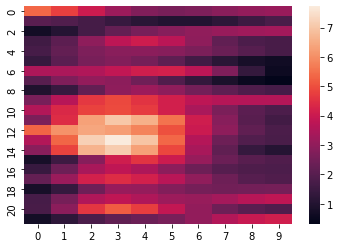

In [283]:
sns.heatmap(X.loc[2].T)

In [200]:
xone =copy.copy(X.loc[1])
xone.loc[-1]=xone.loc[1]

In [202]:
xone.sort_index()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
-1,0.920622,1.039951,0.824280,1.154904,2.139950,0.959413,0.558016,4.900190,0.876102,0.863312,0.303636,0.390667,0.000178,1.156481,0.100727,2.060016,1.943746,2.977436,0.990139,1.113472
0,1.012897,1.324069,0.913945,1.387753,2.372311,1.211690,0.510505,5.757584,0.981004,0.737167,0.312092,0.547001,0.000020,0.892143,0.044860,2.057194,2.218927,3.084500,0.960892,1.056047
1,0.920622,1.039951,0.824280,1.154904,2.139950,0.959413,0.558016,4.900190,0.876102,0.863312,0.303636,0.390667,0.000178,1.156481,0.100727,2.060016,1.943746,2.977436,0.990139,1.113472
2,0.754423,0.692445,0.762808,0.853519,1.698455,0.687679,0.594814,3.418910,0.769669,1.019749,0.348056,0.226998,0.001151,1.589752,0.273633,2.039994,1.542036,2.622294,0.983223,1.183746
3,0.592934,0.474191,0.973835,0.829247,1.181181,0.550486,0.577448,1.748963,0.745119,1.107408,0.574582,0.128250,0.004824,2.001898,0.728580,1.998197,1.311340,2.122995,0.921315,1.193152
4,0.589444,0.414042,1.585877,1.253381,1.079287,0.603055,0.597639,0.830423,0.834130,1.113467,1.143161,0.112996,0.012724,2.174048,1.672018,1.909880,1.157359,2.151232,0.822645,1.086419
5,0.824517,0.419905,2.774663,2.283975,1.656572,0.986487,0.746876,0.622132,1.117611,1.133058,2.355883,0.194577,0.023763,1.979699,3.170322,1.819364,1.064699,3.062395,0.731576,0.912814
6,1.278631,0.430105,4.695295,4.004961,2.555789,1.960890,1.075416,0.817579,1.782303,1.184430,4.337886,0.317222,0.034494,1.494840,4.938735,1.879877,0.984734,4.338366,0.710683,0.722771
7,1.798911,0.436307,6.946785,6.194964,3.348186,3.375495,1.539348,1.266133,2.898554,1.206665,6.726621,0.400427,0.041899,1.071305,6.394255,2.266071,0.976912,5.293838,0.837521,0.584154
8,2.175688,0.441432,8.764623,8.102796,3.871946,4.502106,1.965497,1.833721,3.985838,1.190768,8.437925,0.444740,0.045156,0.909898,7.356873,2.755779,1.045827,5.785508,1.107332,0.537854


In [195]:
X.insert(0,X.loc[1])

TypeError: insert() missing 1 required positional argument: 'value'

In [55]:
cell_cols

array([  1,   2,   3,   5,   6,   7,  10,  11,  14,  18,  19,  21,  22,
        23,  24,  26,  31,  34,  36,  37,  39,  43,  44,  49,  51,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  68,  70,
        73,  75,  78,  79,  80,  82,  83,  84,  85,  86,  90,  91,  92,
        94,  95,  97,  98,  99, 101, 102, 103, 104, 105, 110, 111, 112,
       113, 116, 123, 124, 126, 128, 129, 131, 132, 134, 136, 137, 138,
       140, 141, 144, 145, 146, 148, 150, 152, 154, 155, 161, 163, 164,
       165, 167, 169, 172, 173, 175, 176, 177, 179], dtype=uint8)

<AxesSubplot:>

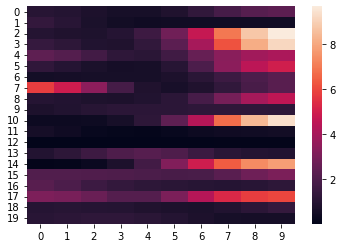

In [203]:
sns.heatmap(fr_map_trial[0,:,:].T)

<AxesSubplot:>

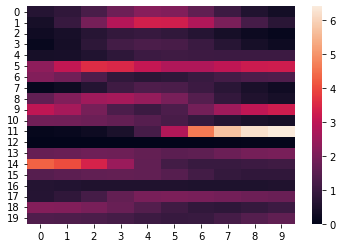

In [66]:
sns.heatmap(X_all[1,1].loc[2].T)

In [37]:
na.get_peaks_in_fr(X_all[0,0],max_fr_thresh=1.)

,,1,2,3,5,6,7,10,11,14,18,...,164,165,167,169,172,173,175,176,177,179
0,4,3.855434,2.736316,0.411293,0.477521,1.643969,0.774771,5.152755,1.320741,0.614490,2.054727,...,3.719534,2.312291,1.962684,0.513490,0.409377,2.497879,1.378427,0.461077,2.425098,1.207917
1,4,3.090182,1.156013,0.104190,1.492272,1.450502,0.249432,3.904606,0.847643,1.568081,2.095169,...,5.345776,0.760074,5.224183,0.027261,0.809316,4.158584,0.686055,0.578896,2.893334,0.280943
2,3,3.002430,2.220876,0.257726,0.984275,1.750678,0.999578,2.252161,1.265655,0.285801,2.145188,...,5.584428,1.569803,6.286165,0.124522,1.329214,4.037101,0.321790,0.853976,3.734046,0.367218
3,5,3.356239,3.729987,0.131039,1.358005,1.153328,1.080805,2.365483,1.210234,0.699451,3.591579,...,5.247501,0.832340,5.780185,0.125745,1.274923,3.474090,0.436327,0.982042,2.620558,0.443176
5,5,4.748375,2.127055,0.312698,2.250648,1.130227,0.868661,1.253234,1.424918,1.502075,3.476367,...,6.594122,1.447429,5.759688,0.142182,1.763101,3.576717,0.875555,1.341430,4.323034,0.514706
6,5,4.511507,4.180738,0.280034,1.210046,1.144997,0.446022,1.671914,1.587732,1.455773,3.434779,...,3.441010,0.963201,4.961162,0.106464,2.118202,3.737557,0.182305,1.121337,7.321971,0.457673
7,2,3.482192,3.061591,0.575886,1.079964,0.830387,1.886268,3.294183,1.531856,1.394302,2.820998,...,2.767310,0.578558,4.347798,0.010865,2.764689,2.822140,0.488583,0.726578,6.218282,0.440619
8,5,3.298696,2.969657,1.034983,1.476589,1.063113,1.080140,3.335296,1.145110,1.357159,2.221943,...,4.346686,0.997141,4.076741,0.000000,2.375050,2.201804,1.069214,0.736762,4.141281,1.093291
9,3,4.219722,4.907637,1.318288,0.526609,1.276670,1.228903,3.100343,1.067972,1.561569,2.822663,...,3.638553,0.810951,5.806295,0.000000,1.719741,3.294740,0.934201,1.339284,5.378735,1.336607
10,1,2.265785,4.346627,0.729659,0.174164,1.055500,0.672276,2.022757,1.925175,1.995881,3.547128,...,4.543055,1.272098,4.289058,0.377511,0.982073,3.602156,0.466991,1.258867,11.500183,1.190587


In [35]:
X_all[0,0]

0         1         2         3         4         5         6   \
1   0  1.087474  1.387782  3.090261  2.811909  2.232653  2.529771  1.893884   
    1  1.558399  1.541581  3.190247  2.645975  2.577114  3.014439  2.581273   
    2  2.501218  1.929020  3.159170  2.488618  3.072691  3.590552  3.478642   
    3  3.375973  2.515366  3.002430  2.578773  3.554894  4.196519  4.202588   
    4  3.855434  3.090182  2.713501  2.949572  4.084604  4.596170  4.526112   
...         ...       ...       ...       ...       ...       ...       ...   
179 5  1.022905  0.303269  0.417818  0.443176  0.549000  0.514706  0.457673   
    6  0.984233  0.420214  0.476408  0.374582  0.475806  0.449323  0.340512   
    7  1.069250  0.629596  0.554017  0.306168  0.439074  0.426548  0.209771   
    8  1.185908  0.875715  0.624341  0.275603  0.464079  0.438844  0.092421   
    9  1.258292  1.031354  0.664202  0.269292  0.511421  0.453010  0.035429   

             7         8         9   ...        12        13        14  \
1   0  1.334739  3.107845  2.225128  ...  1.899400  2.225495  1.203788   
    1  2.347871  2.975518  2.972390  ...  1.870977  2.493838  1.741825   
    2  3.482192  2.841109  3.808192  ...  1.918537  3.092288  2.548734   
    3  4.406528  2.855089  4.219722  ...  2.011009  3.862148  3.293555   
    4  4.988185  3.031139  4.120999  ...  2.118105  4.468622  3.762565   
...         ...       ...       ...  ...       ...       ...       ...   
179 5  0.877749  1.093291  1.011878  ...  0.540381  0.573962  0.731002   
    6  0.971638  1.046446  0.855517  ...  0.419986  0.482281  0.585745   
    7  1.000353  0.978321  0.738439  ...  0.314773  0.402364  0.546745   
    8  0.959474  0.838697  0.655508  ...  0.249210  0.351330  0.630982   
    9  0.905726  0.714880  0.607527  ...  0.225164  0.327602  0.733570   

             15        16        17        18        19        20        21  
1   0  3.189932  1.574613  3.800755  1.108257  1.054292  0.468107  3.182115  
    1  3.342096  1.755188  4.057715  1.296998  1.642305  0.468460  3.243317  
    2  3.297109  2.031391  4.513242  1.773200  2.569887  0.567154  3.073145  
    3  2.898170  2.406020  4.688629  2.402815  3.236412  0.788084  2.945250  
    4  2.340363  2.619822  4.673150  2.923145  3.491350  1.164298  3.052713  
...         ...       ...       ...       ...       ...       ...       ...  
179 5  0.565527  0.599147  0.660649  0.710937  0.857087  0.900298  0.430562  
    6  0.366613  0.447819  0.503520  0.567443  0.669824  0.736943  0.367973  
    7  0.210127  0.319101  0.311149  0.459156  0.484938  0.622949  0.327714  
    8  0.131944  0.230641  0.146487  0.389660  0.377362  0.590540  0.311339  
    9  0.104811  0.174009  0.062202  0.359779  0.337914  0.592323  0.305919  

[1000 rows x 22 columns]

In [93]:
fr_map_trial_df

0         1         2         3         4         5         6   \
1   0  1.012897  1.324069  0.913945  1.387753  2.372311  1.211690  0.510505   
    1  0.920622  1.039951  0.824280  1.154904  2.139950  0.959413  0.558016   
    2  0.754423  0.692445  0.762808  0.853519  1.698455  0.687679  0.594814   
    3  0.592934  0.474191  0.973835  0.829247  1.181181  0.550486  0.577448   
    4  0.589444  0.414042  1.585877  1.253381  1.079287  0.603055  0.597639   
...         ...       ...       ...       ...       ...       ...       ...   
179 5  0.814369  0.103858  0.182743  0.276226  0.433617  0.631187  0.273501   
    6  0.789113  0.209293  0.225399  0.286537  0.505524  0.595996  0.330164   
    7  0.673941  0.357181  0.264874  0.279967  0.586738  0.457761  0.401916   
    8  0.540302  0.497401  0.288707  0.258215  0.651171  0.320244  0.465926   
    9  0.455818  0.572599  0.297724  0.239903  0.684074  0.251960  0.503178   

             7         8         9         10        11        12        13  \
1   0  5.757584  0.981004  0.737167  0.312092  0.547001  0.000020  0.892143   
    1  4.900190  0.876102  0.863312  0.303636  0.390667  0.000178  1.156481   
    2  3.418910  0.769669  1.019749  0.348056  0.226998  0.001151  1.589752   
    3  1.748963  0.745119  1.107408  0.574582  0.128250  0.004824  2.001898   
    4  0.830423  0.834130  1.113467  1.143161  0.112996  0.012724  2.174048   
...         ...       ...       ...       ...       ...       ...       ...   
179 5  0.008705  0.532858  0.539134  0.367470  0.206445  0.551798  0.329150   
    6  0.001632  0.551689  0.493201  0.486333  0.297698  0.410541  0.400806   
    7  0.000249  0.579440  0.391238  0.581183  0.346734  0.306292  0.520749   
    8  0.000028  0.600433  0.286093  0.603222  0.374989  0.254668  0.604994   
    9  0.000000  0.608020  0.222850  0.604871  0.387913  0.237540  0.641174   

             14        15        16        17        18        19  
1   0  0.044860  2.057194  2.218927  3.084500  0.960892  1.056047  
    1  0.100727  2.060016  1.943746  2.977436  0.990139  1.113472  
    2  0.273633  2.039994  1.542036  2.622294  0.983223  1.183746  
    3  0.728580  1.998197  1.311340  2.122995  0.921315  1.193152  
    4  1.672018  1.909880  1.157359  2.151232  0.822645  1.086419  
...         ...       ...       ...       ...       ...       ...  
179 5  0.286612  0.458795  0.254578  0.048121  0.166819  0.305255  
    6  0.454374  0.401926  0.274410  0.060238  0.130081  0.344001  
    7  0.587115  0.363480  0.289503  0.073846  0.105722  0.388746  
    8  0.671251  0.348096  0.291047  0.081368  0.091806  0.423793  
    9  0.706881  0.341977  0.286929  0.084146  0.085337  0.440537  

[1000 rows x 20 columns]

In [95]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

<module 'statsmodels.api' from '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/api.py'>

In [99]:
fr_map_trial_df.loc[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.012897,1.324069,0.913945,1.387753,2.372311,1.211690,0.510505,5.757584,0.981004,0.737167,0.312092,0.547001,0.000020,0.892143,0.044860,2.057194,2.218927,3.084500,0.960892,1.056047
1,0.920622,1.039951,0.824280,1.154904,2.139950,0.959413,0.558016,4.900190,0.876102,0.863312,0.303636,0.390667,0.000178,1.156481,0.100727,2.060016,1.943746,2.977436,0.990139,1.113472
2,0.754423,0.692445,0.762808,0.853519,1.698455,0.687679,0.594814,3.418910,0.769669,1.019749,0.348056,0.226998,0.001151,1.589752,0.273633,2.039994,1.542036,2.622294,0.983223,1.183746
3,0.592934,0.474191,0.973835,0.829247,1.181181,0.550486,0.577448,1.748963,0.745119,1.107408,0.574582,0.128250,0.004824,2.001898,0.728580,1.998197,1.311340,2.122995,0.921315,1.193152
4,0.589444,0.414042,1.585877,1.253381,1.079287,0.603055,0.597639,0.830423,0.834130,1.113467,1.143161,0.112996,0.012724,2.174048,1.672018,1.909880,1.157359,2.151232,0.822645,1.086419
5,0.824517,0.419905,2.774663,2.283975,1.656572,0.986487,0.746876,0.622132,1.117611,1.133058,2.355883,0.194577,0.023763,1.979699,3.170322,1.819364,1.064699,3.062395,0.731576,0.912814
6,1.278631,0.430105,4.695295,4.004961,2.555789,1.960890,1.075416,0.817579,1.782303,1.184430,4.337886,0.317222,0.034494,1.494840,4.938735,1.879877,0.984734,4.338366,0.710683,0.722771
7,1.798911,0.436307,6.946785,6.194964,3.348186,3.375495,1.539348,1.266133,2.898554,1.206665,6.726621,0.400427,0.041899,1.071305,6.394255,2.266071,0.976912,5.293838,0.837521,0.584154
8,2.175688,0.441432,8.764623,8.102796,3.871946,4.502106,1.965497,1.833721,3.985838,1.190768,8.437925,0.444740,0.045156,0.909898,7.356873,2.755779,1.045827,5.785508,1.107332,0.537854
9,2.334963,0.445699,9.690144,9.164121,4.110638,4.981006,2.208297,2.233036,4.558785,1.167931,9.377332,0.461936,0.045843,0.879355,7.777273,3.055042,1.144893,5.966440,1.351669,0.546873


In [103]:
fr_map_trial_df

0         1         2         3         4         5         6   \
1   0  1.012897  1.324069  0.913945  1.387753  2.372311  1.211690  0.510505   
    1  0.920622  1.039951  0.824280  1.154904  2.139950  0.959413  0.558016   
    2  0.754423  0.692445  0.762808  0.853519  1.698455  0.687679  0.594814   
    3  0.592934  0.474191  0.973835  0.829247  1.181181  0.550486  0.577448   
    4  0.589444  0.414042  1.585877  1.253381  1.079287  0.603055  0.597639   
...         ...       ...       ...       ...       ...       ...       ...   
179 5  0.814369  0.103858  0.182743  0.276226  0.433617  0.631187  0.273501   
    6  0.789113  0.209293  0.225399  0.286537  0.505524  0.595996  0.330164   
    7  0.673941  0.357181  0.264874  0.279967  0.586738  0.457761  0.401916   
    8  0.540302  0.497401  0.288707  0.258215  0.651171  0.320244  0.465926   
    9  0.455818  0.572599  0.297724  0.239903  0.684074  0.251960  0.503178   

             7         8         9         10        11        12        13  \
1   0  5.757584  0.981004  0.737167  0.312092  0.547001  0.000020  0.892143   
    1  4.900190  0.876102  0.863312  0.303636  0.390667  0.000178  1.156481   
    2  3.418910  0.769669  1.019749  0.348056  0.226998  0.001151  1.589752   
    3  1.748963  0.745119  1.107408  0.574582  0.128250  0.004824  2.001898   
    4  0.830423  0.834130  1.113467  1.143161  0.112996  0.012724  2.174048   
...         ...       ...       ...       ...       ...       ...       ...   
179 5  0.008705  0.532858  0.539134  0.367470  0.206445  0.551798  0.329150   
    6  0.001632  0.551689  0.493201  0.486333  0.297698  0.410541  0.400806   
    7  0.000249  0.579440  0.391238  0.581183  0.346734  0.306292  0.520749   
    8  0.000028  0.600433  0.286093  0.603222  0.374989  0.254668  0.604994   
    9  0.000000  0.608020  0.222850  0.604871  0.387913  0.237540  0.641174   

             14        15        16        17        18        19  
1   0  0.044860  2.057194  2.218927  3.084500  0.960892  1.056047  
    1  0.100727  2.060016  1.943746  2.977436  0.990139  1.113472  
    2  0.273633  2.039994  1.542036  2.622294  0.983223  1.183746  
    3  0.728580  1.998197  1.311340  2.122995  0.921315  1.193152  
    4  1.672018  1.909880  1.157359  2.151232  0.822645  1.086419  
...         ...       ...       ...       ...       ...       ...  
179 5  0.286612  0.458795  0.254578  0.048121  0.166819  0.305255  
    6  0.454374  0.401926  0.274410  0.060238  0.130081  0.344001  
    7  0.587115  0.363480  0.289503  0.073846  0.105722  0.388746  
    8  0.671251  0.348096  0.291047  0.081368  0.091806  0.423793  
    9  0.706881  0.341977  0.286929  0.084146  0.085337  0.440537  

[1000 rows x 20 columns]

In [115]:
nmf_res_d[False,1,True]['W_df_peaks_only_post_sorted_d'][0,0]

0         1         2         3       sum  \
factor     lin_binned                                                     
0      115 1           1.952704  0.000000  0.037887  0.000000  1.990591   
       43  7           1.793029  0.493216  0.235304  0.706911  3.228459   
       115 5           1.722417  0.534352  0.433410  0.707327  3.397507   
       64  8           1.408802  0.448430  0.388839  0.140072  2.386143   
       167 8           1.121704  0.695340  0.786451  0.605458  3.208954   
...                         ...       ...       ...       ...       ...   
3      131 2           0.167977  1.044379  0.686453  1.074728  2.973537   
       102 2           0.336104  0.498680  0.166508  0.523177  1.524469   
       23  5           0.435600  0.512125  0.205408  0.520578  1.673711   
       11  6           0.108318  0.368710  0.312912  0.376841  1.166781   
       41  5           0.073092  0.095271  0.089264  0.099385  0.357012   

                        entropy      skew    skew_0    skew_1        skew_2  \
factor     lin_binned                                                         
0      115 1           0.094252  1.153532  5.193511 -0.207772 -1.638390e-01   
       43  7           1.137095  0.885577  4.590956 -0.148168 -8.956611e-01   
       115 5           1.224700  1.032848  4.915107 -0.230921 -5.316234e-01   
       64  8           1.087355  0.950848  4.755726 -0.028829 -7.950792e-02   
       167 8           1.358080  0.798238  4.381676 -0.164164 -5.287772e-04   
...                         ...       ...       ...       ...           ...   
3      131 2           1.236080 -0.649856 -3.897850  0.557925 -3.775238e-03   
       102 2           1.307775 -0.466345 -0.031026  0.552722 -3.362297e+00   
       23  5           1.333378 -0.940533  0.002451  0.398148 -4.678653e+00   
       11  6           1.302672 -0.989501 -4.801834  0.355709  7.437064e-03   
       41  5           1.379814 -0.740531 -4.219996  0.217919  1.221405e-09   

                         skew_3  clust  factor  neg_dist_to_centroid  \
factor     lin_binned                                                  
0      115 1          -0.207772      0       0             -1.092950   
       43  7          -0.004820      0       0             -0.759941   
       115 5          -0.021172      0       0             -0.714556   
       64  8          -0.843997      0       0             -0.401263   
       167 8          -1.024032      0       0             -0.589039   
...                         ...    ...     ...                   ...   
3      131 2           0.744277      5       3             -0.683783   
       102 2           0.975220      5       3             -0.277954   
       23  5           0.515921      5       3             -0.307601   
       11  6           0.480684      5       3             -0.407207   
       41  5           1.039954      2       3             -0.115335   

                       skew_0_binned  skew_binned  skew_1_binned  \
factor     lin_binned                                              
0      115 1                     3.0            3            NaN   
       43  7                     3.0            3            NaN   
       115 5                     3.0            3            NaN   
       64  8                     3.0            3            NaN   
       167 8                     3.0            3            NaN   
...                              ...          ...            ...   
3      131 2                     NaN            0            NaN   
       102 2                     NaN            0            NaN   
       23  5                     NaN            0            NaN   
       11  6                     NaN            0            NaN   
       41  5                     NaN            0            NaN   

                       skew_2_binned  skew_3_binned  
factor     lin_binned                                
0      115 1                     NaN            NaN  
       43  7                     NaN      

In [116]:
nmf_res_d[False,1,True]['W_df_peaks_only_post_sorted_d'][0,0].loc[(slice(None),1),:]

,,,0,1,2,3,sum,entropy,skew,skew_0,skew_1,skew_2,skew_3,clust,factor,neg_dist_to_centroid,skew_0_binned,skew_binned,skew_1_binned,skew_2_binned,skew_3_binned
factor,,lin_binned,,,,,,,,,,,,,,,,,,,
0,1,2,0.438972,0.271367,0.000000,0.388824,1.099164,1.079524,-0.756361,0.902189,-0.000008,-4.229911,0.302289,2,0,-0.409303,0.0,0,NaN,NaN,NaN
1,1,5,0.620142,1.087249,0.280459,0.337705,2.325555,1.243227,0.675320,0.001791,3.983373,-0.838599,-0.445287,5,1,-0.675905,NaN,3,2.0,NaN,NaN
3,1,8,1.290734,0.533250,0.420171,1.361675,3.605830,1.268640,-0.015824,0.755768,-0.639575,-1.428326,1.248836,0,3,-1.025974,NaN,1,NaN,NaN,0.0


In [104]:
na.get_peaks_in_fr(X_all[0,0],max_fr_thresh=1.)

,,1,2,3,5,6,7,10,11,14,18,...,164,165,167,169,172,173,175,176,177,179
0,4,3.855434,2.736316,0.411293,0.477521,1.643969,0.774771,5.152755,1.320741,0.614490,2.054727,...,3.719534,2.312291,1.962684,0.513490,0.409377,2.497879,1.378427,0.461077,2.425098,1.207917
1,4,3.090182,1.156013,0.104190,1.492272,1.450502,0.249432,3.904606,0.847643,1.568081,2.095169,...,5.345776,0.760074,5.224183,0.027261,0.809316,4.158584,0.686055,0.578896,2.893334,0.280943
2,3,3.002430,2.220876,0.257726,0.984275,1.750678,0.999578,2.252161,1.265655,0.285801,2.145188,...,5.584428,1.569803,6.286165,0.124522,1.329214,4.037101,0.321790,0.853976,3.734046,0.367218
3,5,3.356239,3.729987,0.131039,1.358005,1.153328,1.080805,2.365483,1.210234,0.699451,3.591579,...,5.247501,0.832340,5.780185,0.125745,1.274923,3.474090,0.436327,0.982042,2.620558,0.443176
5,5,4.748375,2.127055,0.312698,2.250648,1.130227,0.868661,1.253234,1.424918,1.502075,3.476367,...,6.594122,1.447429,5.759688,0.142182,1.763101,3.576717,0.875555,1.341430,4.323034,0.514706
6,5,4.511507,4.180738,0.280034,1.210046,1.144997,0.446022,1.671914,1.587732,1.455773,3.434779,...,3.441010,0.963201,4.961162,0.106464,2.118202,3.737557,0.182305,1.121337,7.321971,0.457673
7,2,3.482192,3.061591,0.575886,1.079964,0.830387,1.886268,3.294183,1.531856,1.394302,2.820998,...,2.767310,0.578558,4.347798,0.010865,2.764689,2.822140,0.488583,0.726578,6.218282,0.440619
8,5,3.298696,2.969657,1.034983,1.476589,1.063113,1.080140,3.335296,1.145110,1.357159,2.221943,...,4.346686,0.997141,4.076741,0.000000,2.375050,2.201804,1.069214,0.736762,4.141281,1.093291
9,3,4.219722,4.907637,1.318288,0.526609,1.276670,1.228903,3.100343,1.067972,1.561569,2.822663,...,3.638553,0.810951,5.806295,0.000000,1.719741,3.294740,0.934201,1.339284,5.378735,1.336607
10,1,2.265785,4.346627,0.729659,0.174164,1.055500,0.672276,2.022757,1.925175,1.995881,3.547128,...,4.543055,1.272098,4.289058,0.377511,0.982073,3.602156,0.466991,1.258867,11.500183,1.190587


In [187]:
%matplotlib inline
nn=41
sns.heatmap(fr_map_trial_df.loc[nn].T)

KeyError: 41

<AxesSubplot:>

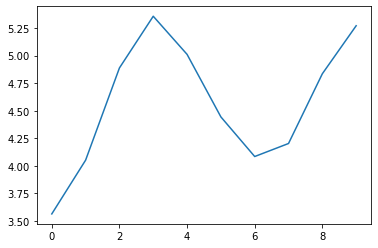

In [172]:
fr_map_trial_df.loc[nn].max(axis=1).plot()

<IPython.core.display.Javascript object>


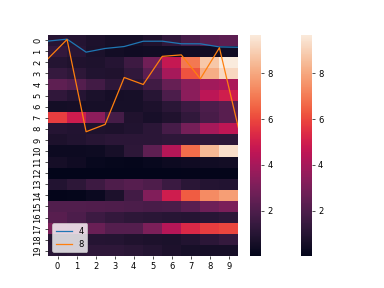

<AxesSubplot:>

In [105]:
fr_map_trial_df.loc[1].loc[[4,8]].T.plot()